# Bernstein-Vazirani Algorithm

In [33]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [34]:
secretnumber = '101001'

In [35]:
circuit = QuantumCircuit(6+1,6) #6 for secret number plus 1 qubit and then 6 bits to store
circuit.h([0,1,2,3,4,5]) #apply hadamard on first 6 qubits
circuit.x(6)
circuit.h(6)

circuit.barrier()

Put a CX gate on every 1 in the secret number.

In [36]:
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()

circuit.h([0,1,2,3,4,5])

circuit.barrier()

In [40]:
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

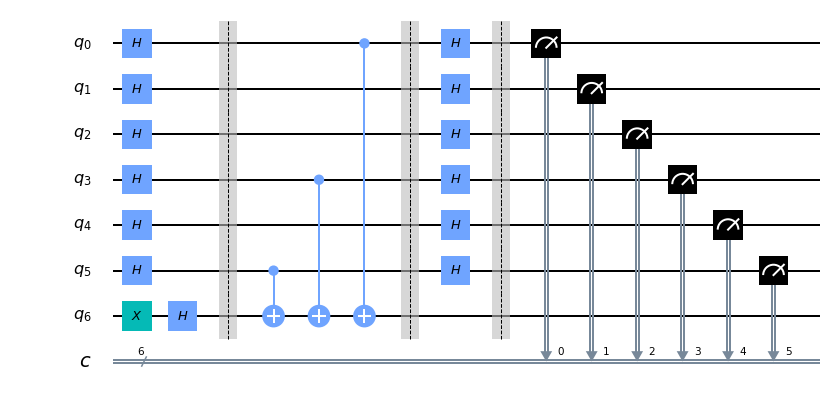

In [41]:
circuit.draw(output='mpl')

In [42]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts =result.get_counts()
print(counts)

{'101001': 1}


Here we see that it guessed our number in one try.

Now we can generalise the code for any secret number

In [64]:
secretnumber = '10010100101'

In [65]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber)) #6 for secret number plus 1 qubit and then 6 bits to store
circuit.h(range(len(secretnumber))) #apply hadamard to length of secret number
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
                           if yesno == '1':
                               circuit.cx(ii, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

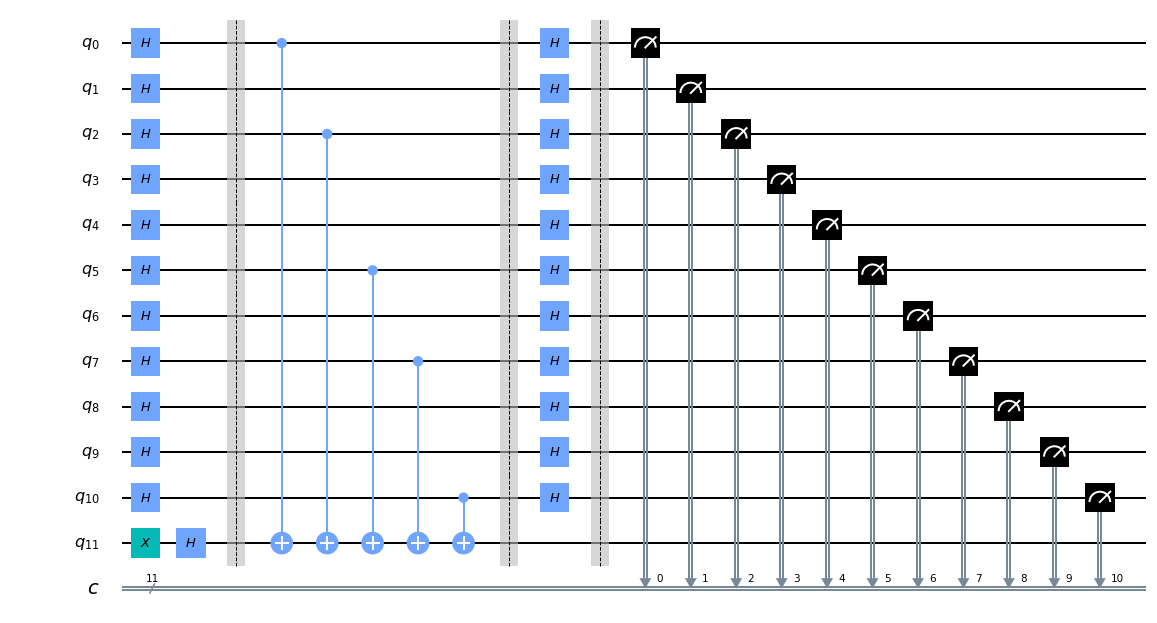

In [66]:
circuit.draw(output='mpl')

In [67]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts =result.get_counts()
print(counts)

{'10010100101': 1}
